#                                             CVS

### Data collection

In [105]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [106]:
tickers = ['CVS']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [107]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6867 entries, 1995-01-03 to 2022-04-08
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CVS     6867 non-null   float64
dtypes: float64(1)
memory usage: 107.3 KB


In [108]:
mydata.head()

,CVS
Date,
1995-01-03,4.515667
1995-01-04,4.497678
1995-01-05,4.515667
1995-01-06,4.515667
1995-01-09,4.479686


In [109]:
mydata.tail()

,CVS
Date,
2022-04-04,100.000000
2022-04-05,99.459999
2022-04-06,102.059998
2022-04-07,103.610001
2022-04-08,106.610001


### Normalization to 100:

In [110]:
mydata.iloc[0]

CVS    4.515667
Name: 1995-01-03 00:00:00, dtype: float64

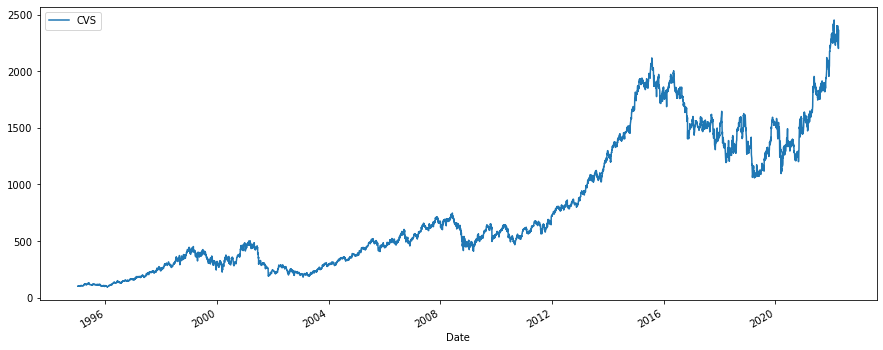

In [111]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 6));
plt.show()

### Find a stock price based on date the graph:

In [112]:
mydata.loc['2019-09-26']

CVS    57.472229
Name: 2019-09-26 00:00:00, dtype: float64

## Calculating the Return of a Portfolio of Securities

In [113]:
returns = (mydata / mydata.shift(1)) - 1
returns.tail()

,CVS
Date,
2022-04-04,-0.010782
2022-04-05,-0.005400
2022-04-06,0.026141
2022-04-07,0.015187
2022-04-08,0.028955


### Porfolio Weights:

In [114]:
weights = np.array([1])

In [115]:
np.dot(returns, weights)

array([        nan, -0.00398383,  0.00399976, ...,  0.02614115,
        0.01518718,  0.02895473])

***

## Average Annual Returns of the porfolio over past couple decades:

### CVS Stock:

In [116]:
annual_returns = returns.mean() * 250
annual_returns

CVS    0.161483
dtype: float64

### Total porfolio:

In [117]:
np.dot(annual_returns, weights)

0.16148297404927045

In [118]:
pfolio_1 = str(round(np.dot(annual_returns, weights), 3) * 100) + ' %'
print (pfolio_1)

16.1 %


***

## Compare the risk between CVS and S&P500 index

In [119]:
tickers = ['CVS', 'VOO']

data = pd.DataFrame()

for t in tickers:
    data[t] = wb.DataReader(t, data_source='yahoo', start='2011-1-1')['Adj Close']

In [120]:
returns = np.log(data / data.shift(1))
returns

,CVS,VOO
Date,,
2010-12-31,NaN,NaN
2011-01-03,0.008021,0.009336
2011-01-04,-0.000856,-0.000861
2011-01-05,0.010510,0.005325
2011-01-06,-0.010224,-0.001715
...,...,...
2022-04-04,-0.010841,0.008443
2022-04-05,-0.005415,-0.012439
2022-04-06,0.025805,-0.010180


### CVS

Daily risk:

In [121]:
returns['CVS'].std()

0.015012610845364606

Annual risk:

In [122]:
returns['CVS'].std() * 250 ** 0.5

0.23737021948549009

### S&P 500

Daily risk:

In [123]:
returns['VOO'].std()

0.010827401123249777

Annual risk:

In [124]:
returns['VOO'].std() * 250 ** 0.5

0.17119624344867393

******

### Volatility:

In [125]:
vols = returns[['CVS', 'VOO']].std() * 250 ** 0.5
vols

CVS    0.237370
VOO    0.171196
dtype: float64

***

# Calculating Porfolio Risk:

## Covariance and Correlation

In [126]:
cov_matrix = returns.cov()
cov_matrix

,CVS,VOO
CVS,0.000225,0.000091
VOO,0.000091,0.000117


In [127]:
cov_matrix_a = returns.cov() * 250
cov_matrix_a

,CVS,VOO
CVS,0.056345,0.022784
VOO,0.022784,0.029308


***

In [128]:
corr_matrix = returns.corr()
corr_matrix

,CVS,VOO
CVS,1.000000,0.560667
VOO,0.560667,1.000000


## Calculating Portfolio Risk

Equal weigthing scheme:

In [129]:
weights = np.array([0.5, 0.5])

Portfolio Variance:

In [130]:
pfolio_var = np.dot(weights.T, np.dot(returns.cov() * 250, weights))
pfolio_var

0.03280506857742049

Portfolio Volatility:

In [131]:
pfolio_vol = (np.dot(weights.T, np.dot(returns.cov() * 250, weights))) ** 0.5
pfolio_vol

0.1811216954906852

In [132]:
print (str(round(pfolio_vol, 3) * 100) + ' %')

18.099999999999998 %


***

# The diversifiable and non diversifiable risks of a porfolio

In [133]:
tickers = ['CVS', 'VOO']
sec_data = pd.DataFrame()
for t in tickers:
    sec_data[t] = wb.DataReader(t, data_source='yahoo', start='2011-1-1')['Adj Close']
    
sec_data

,CVS,VOO
Date,,
2010-12-31,27.257410,93.061188
2011-01-03,27.476908,93.934090
2011-01-04,27.453396,93.853294
2011-01-05,27.743456,94.354378
2011-01-06,27.461231,94.192757
...,...,...
2022-04-04,100.000000,419.850006
2022-04-05,99.459999,414.660004
2022-04-06,102.059998,410.459991


In [134]:
sec_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2838 entries, 2010-12-31 to 2022-04-08
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CVS     2838 non-null   float64
 1   VOO     2838 non-null   float64
dtypes: float64(2)
memory usage: 66.5 KB


Then, calculate the diversifiable and the non-diversifiable risk of a portfolio, composed of these two stocks:

a) with weights 0.5 and 0.5;

In [135]:
sec_returns = np.log(sec_data / sec_data.shift(1))
sec_returns

,CVS,VOO
Date,,
2010-12-31,NaN,NaN
2011-01-03,0.008021,0.009336
2011-01-04,-0.000856,-0.000860
2011-01-05,0.010510,0.005325
2011-01-06,-0.010225,-0.001714
...,...,...
2022-04-04,-0.010841,0.008443
2022-04-05,-0.005415,-0.012439
2022-04-06,0.025805,-0.010180


### Calculating Portfolio Variance

Weightings scheme:

In [136]:
weights = np.array([0.5, 0.5])

Portfolio Variance:

In [137]:
pfolio_var = np.dot(weights.T, np.dot(sec_returns.cov() * 250, weights))
pfolio_var

0.03280508173621757

*****

# Testing different weight combination for a porfolio. 

In [144]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

assets = ['AAPL','OXY', 'CVS']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2014-1-1')['Adj Close']

In [145]:
log_returns = np.log(pf_data / pf_data.shift(1))

num_assets = len(assets)

weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([0.539701  , 0.43468911, 0.02560989])

Expected Portfolio Return:

In [146]:
np.sum(weights * log_returns.mean()) * 250

0.14393460500086394

Expected Portfolio Variance:

In [147]:
np.dot(weights.T, np.dot(log_returns.cov() * 250, weights))

0.09315767019158644

Expected Portfolio Volatility:

In [148]:
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))

0.3052174146269941

In [149]:
pf_returns = []
pf_volatilities = []
weights_1 = []
weights_2 = []
weights_3 = []

In [150]:
for x in range (1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    weights_1.append(weights[0])
    weights_2.append(weights[1])
    weights_3.append(weights[2])
    pf_returns.append(np.sum(weights * log_returns.mean()) * 250)
    pf_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))

In [151]:
pf_returns = np.array(pf_returns)
pf_volatilities = np.array(pf_volatilities)
weights_1 = np.array(weights_1)
weights_2 = np.array(weights_2)
weights_3 = np.array(weights_3)


In [152]:
portfolios = pd.DataFrame({'Return' : pf_returns, 'Volatility' : pf_volatilities, 'WMT_weights' : weights_1, 'FB_weights': weights_2, 'BP_weights': weights_3})

In [153]:
portfolios.head()

,Return,Volatility,WMT_weights,FB_weights,BP_weights
0,0.097421,0.347277,0.366317,0.580626,0.053057
1,0.114523,0.266568,0.361026,0.358269,0.280705
2,0.080636,0.274692,0.204760,0.391415,0.403826
3,0.094227,0.280906,0.280705,0.410547,0.308748
4,0.114384,0.223959,0.285182,0.174649,0.540169


In [154]:
portfolios.tail()

,Return,Volatility,WMT_weights,FB_weights,BP_weights
995,0.083098,0.233518,0.086996,0.073518,0.839486
996,-0.002401,0.504019,0.024443,0.967657,0.007900
997,0.091231,0.227908,0.157469,0.146116,0.696415
998,0.116404,0.245775,0.340970,0.286233,0.372797
999,0.222438,0.251103,0.792076,0.090030,0.117894


Text(0, 0.5, 'Expected Return')

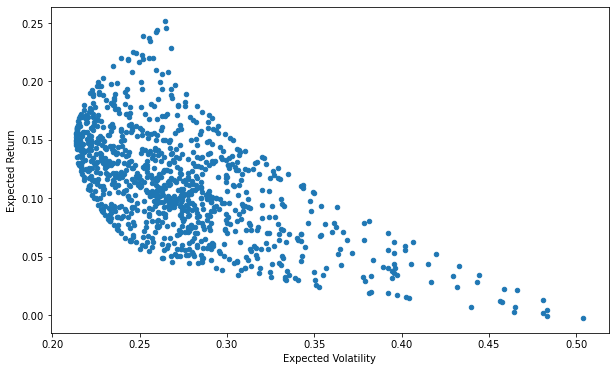

In [155]:
portfolios.plot(x = 'Volatility', y = 'Return', kind = 'scatter', figsize = (10, 6));
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')

*****

# Assess if a stock is defensive or aggressive - Beta Value

In [209]:
import pandas as pd
import numpy as np 
from pandas_datareader import data as wb 
stockvsmarket = ['CVS', '^GSPC']
stock_data = pd.DataFrame()

for i in stockvsmarket:
    stock_data[i] = wb.DataReader(i, data_source = 'yahoo', start = '04-10-2017', end = '04-01-2022')['Adj Close']
    

In [210]:
stock_return = np.log(stock_data/stock_data.shift(1))

In [211]:
cov = stock_return.cov()*250

In [212]:
cov_with_market = cov.iloc[0,1]

In [213]:
market_var = stock_return['^GSPC'].var()*250

In [214]:
stock_beta = cov_with_market / market_var

stock_beta

0.7768770466883792

# Calculated expected return for a stock

In [162]:
expected_future_return = 0.0270 + stock_beta*0.05
expected_future_return

# 0.0270 = 10 years US treasury bond

0.0662206333350704

**Sharpe ratio:**

In [163]:
Sharpe_CVS = (expected_future_return - 0.0185)/(stock_return['CVS'].std()*250**0.5)
Sharpe_CVS

0.26503687574099033

# Monte Carlo- Predicting Gross Profit

In [164]:
import numpy as np 
import matplotlib.pyplot as plt

In [165]:
rev_m = 170
rev_stdev = 20 
iterations = 1000 

In [166]:
rev = np.random.normal(rev_m, rev_stdev, iterations)

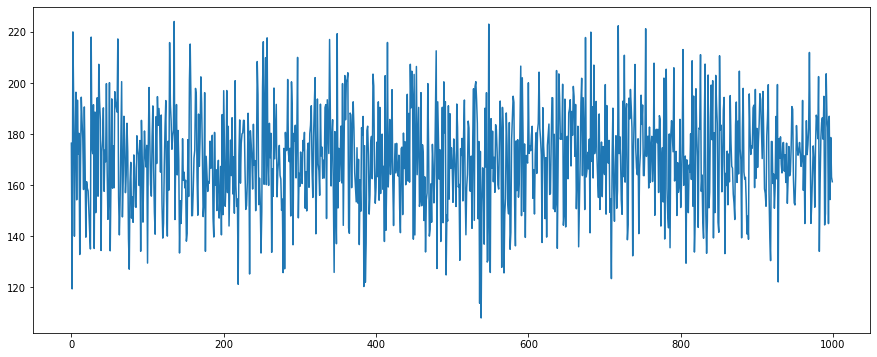

In [167]:
plt.figure(figsize=(15, 6))
plt.plot(rev)
plt.show()

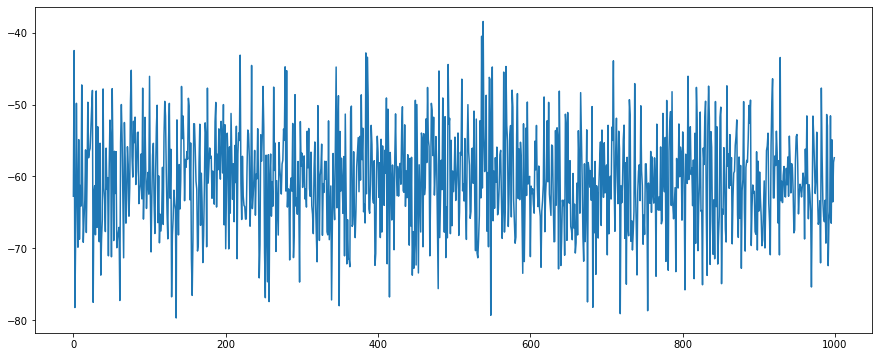

In [168]:
COGS = - (rev * np.random.normal(0.6, 0.1))

plt.figure(figsize =(15, 6))
plt.plot(COGS)
plt.show()


In [169]:
COGS.mean()

-60.5865176246402

In [170]:
COGS.std()

7.062362757097548

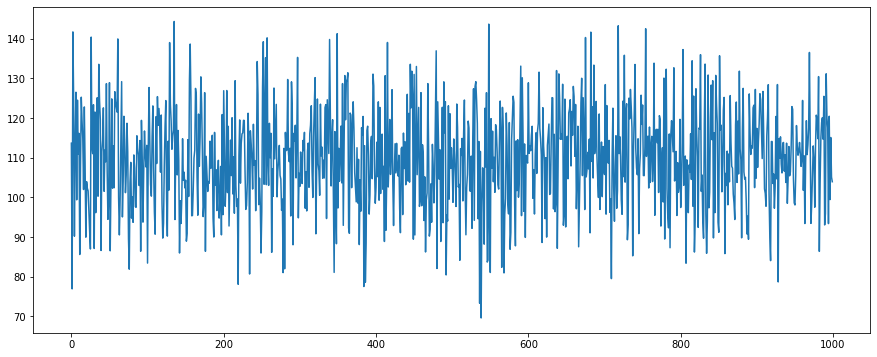

In [171]:
Gross_Profit = rev + COGS
Gross_Profit 

plt.figure(figsize=(15, 6))
plt.plot(Gross_Profit)
plt.show()

In [172]:
max(Gross_Profit)

144.3508449776776

In [173]:
min(Gross_Profit)

69.62597632746235

In [174]:
Gross_Profit.mean()

109.734864986477

In [175]:
Gross_Profit.std()

12.791417200061023

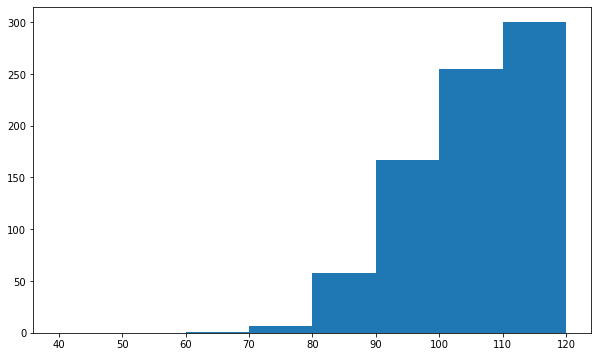

In [176]:
plt.figure(figsize=(10, 6));
plt.hist(Gross_Profit, bins = [40, 50, 60, 70, 80, 90, 100, 110, 120]);
plt.show()

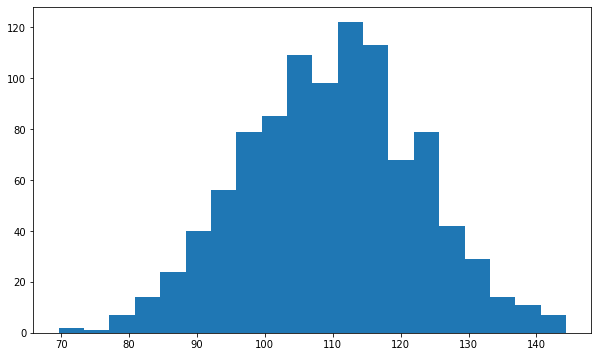

In [177]:
plt.figure(figsize=(10, 6));
plt.hist(Gross_Profit, bins = 20);
plt.show()

# Forcasting Stock Prices

In [178]:
import numpy as np 
import pandas as pd 
from pandas_datareader import data as wb
import matplotlib.pyplot as plt 
from scipy.stats import norm
%matplotlib inline 

In [179]:
ticker = 'CVS'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start ='2010-1-1')['Adj Close']

In [180]:
log_return = np.log(1 + data.pct_change())

In [181]:
log_return.tail()

,CVS
Date,
2022-04-04,-0.010841
2022-04-05,-0.005415
2022-04-06,0.025805
2022-04-07,0.015073
2022-04-08,0.028543


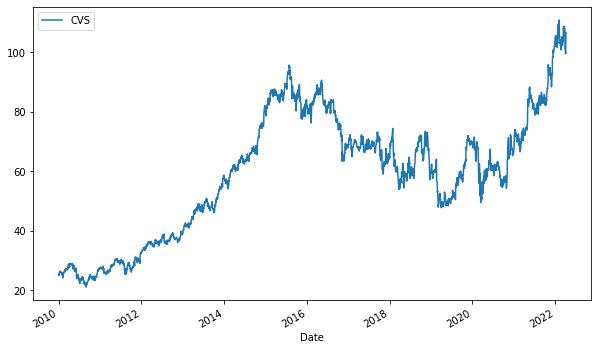

In [182]:
data.plot(figsize=(10, 6));

<AxesSubplot:xlabel='Date'>

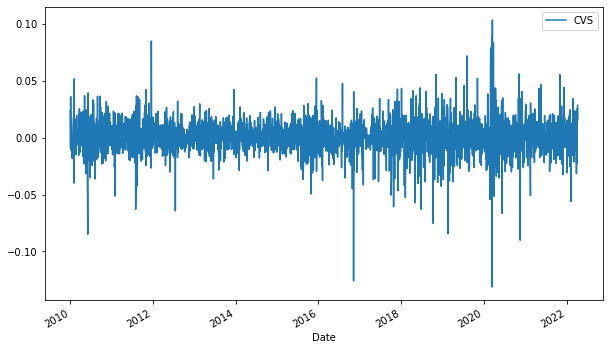

In [183]:
log_return.plot(figsize= (10, 6))

In [184]:
u = log_return.mean()
u

CVS    0.00047
dtype: float64

In [185]:
var = log_return.var()
var

CVS    0.000226
dtype: float64

$$
drift = u - \frac{1}{2} \cdot var
$$

In [186]:
drift = u - (0.5 * var)
drift

CVS    0.000357
dtype: float64

In [187]:
stdev = log_return.std()
stdev

CVS    0.015038
dtype: float64

In [188]:
type(drift)

pandas.core.series.Series

In [189]:
type(stdev)

pandas.core.series.Series

In [190]:
np.array(drift)

array([0.00035668])

In [191]:
drift.values

array([0.00035668])

In [192]:
stdev.values

array([0.01503762])

In [193]:
norm.ppf(0.95)

1.6448536269514722

In [194]:
x = np.random.rand(10,2)
x

array([[0.22646157, 0.91410307],
       [0.45546732, 0.66815955],
       [0.48941246, 0.81566253],
       [0.7199092 , 0.67017637],
       [0.58749313, 0.86009572],
       [0.75684664, 0.10177785],
       [0.52780588, 0.02381917],
       [0.67951795, 0.36534673],
       [0.97452902, 0.94785211],
       [0.12177733, 0.86386082]])

In [195]:
norm.ppf(x)

array([[-0.75055064,  1.36646245],
       [-0.1118597 ,  0.43483678],
       [-0.02654215,  0.89895819],
       [ 0.5825718 ,  0.44040024],
       [ 0.22110108,  1.08074951],
       [ 0.69619499, -1.27148628],
       [ 0.06975554, -1.98058056],
       [ 0.46635125, -0.34420322],
       [ 1.95196834,  1.6243751 ],
       [-1.16614787,  1.09783083]])

In [196]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.92601022, -0.83466941],
       [-0.2036011 ,  2.10790782],
       [ 0.34058851, -0.50773069],
       [ 0.47324435,  0.22415791],
       [-0.55447816,  0.09637769],
       [ 0.21943482, -2.02736786],
       [-1.36410112, -0.5085473 ],
       [ 1.02017426, -0.87885315],
       [ 0.13636158, -0.27066506],
       [-2.99933977, -1.28839754]])

In [197]:
t_intervals = 1000
iterations = 10 

In [198]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [199]:
daily_returns

array([[0.9837485 , 1.00470105, 1.005839  , ..., 1.02598617, 1.00569383,
        0.97798942],
       [0.97909811, 0.98428932, 0.96075453, ..., 0.99422618, 1.01652823,
        0.99391594],
       [0.98645646, 1.00879485, 1.012365  , ..., 1.00553885, 1.01642102,
        0.99699985],
       ...,
       [0.99840748, 0.99946497, 1.00245955, ..., 1.00516513, 1.02768653,
        0.99969693],
       [0.97159327, 0.99385378, 0.98314482, ..., 0.9768927 , 1.0089463 ,
        1.01162828],
       [1.00277815, 1.00117318, 1.01474302, ..., 1.01470677, 0.98172888,
        0.98713509]])

In [200]:
S0 = data.iloc[-1]
S0

CVS    106.610001
Name: 2022-04-08 00:00:00, dtype: float64

In [201]:
price_list = np.zeros_like(daily_returns)

In [202]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [203]:
price_list[0] = S0
price_list

array([[106.61000061, 106.61000061, 106.61000061, ..., 106.61000061,
        106.61000061, 106.61000061],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [204]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1]* daily_returns[t]

In [205]:
price_list

array([[106.61000061, 106.61000061, 106.61000061, ..., 106.61000061,
        106.61000061, 106.61000061],
       [104.38164989, 104.93508513, 102.42604114, ..., 105.99445353,
        108.37207539, 105.96137911],
       [102.96795249, 105.85797379, 103.69253945, ..., 106.58154109,
        110.15165498, 105.64347953],
       ...,
       [ 62.87049919, 170.00293408, 256.08201495, ..., 293.26474214,
        210.82386918, 170.15423422],
       [ 61.0845541 , 168.95805816, 251.76570694, ..., 286.48818608,
        212.70996262, 172.1328358 ],
       [ 61.25425605, 169.15627637, 255.47749458, ..., 290.70150112,
        208.82351437, 169.91836192]])

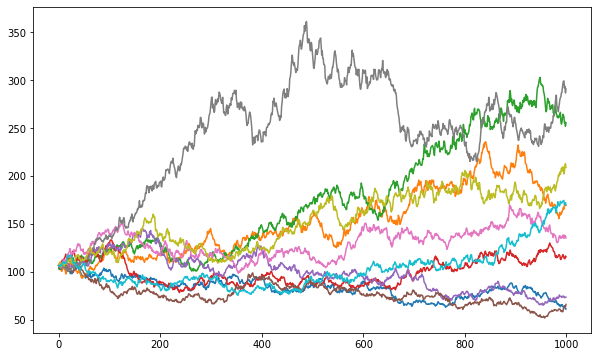

In [206]:
plt.figure(figsize=(10, 6))
plt.plot(price_list);